# **Project: "DetectaDiabetes", Exploración predictiva de la diabetes, un análisis basado en el BRFSS 2015**
- **Source**: UC Irvine Machine Learning Repository. (19 de Marzo del 2025). CDC Diabetes Health Indicators, enlace https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators
- **Date**: 25/09/23
- **Goal**: Create a basic prediction model and a feature explainer

- 1. Introduccion
- 2. Conceptos
- 3. Hipotesis
- 4. Preprocesamiento
- 5. EDA
- 6. Desarrollo de modelos de machine learning
- 7. Comparacion de modelos
- 8. Visualizacion del modelo
- 9. Conclusiones y recomendaciones
- 10. Referencias (apa)

## **1. Introducción**

Este proyecto aborda el tema de la diabetes, una enfermedad crónica que afecta a millones de personas en todo el mundo y tiene un impacto significativo en la calidad de vida y en los sistemas de salud. La detección temprana y el análisis de factores de riesgo son esenciales para desarrollar medidas preventivas eficaces. En este contexto, el presente proyecto se centra en el uso de técnicas de *machine learning* para analizar datos del conjunto **BRFSS** (Behavioral Risk Factor Surveillance System). Su objetivo principal es identificar patrones y construir modelos predictivos que permitan estimar el riesgo de diabetes considerando variables como factores demográficos, conductuales y de salud.

## **2. Conceptos**

### **2.1 Diabetes**
Enfermedad crónica que afecta la forma en que el cuerpo utiliza la glucosa.
Puede causar daño a órganos y sistemas si no se controla adecuadamente.

### **2.2 Tipos de diabetes**

- Tipo 1: El cuerpo no produce insulina (autoinmune).
- Tipo 2: El cuerpo no usa correctamente la insulina (más común).
- Gestacional: Ocurre durante el embarazo.
- Prediabetes: Glucosa elevada, pero no suficiente para diagnóstico.
- Otros tipos: Monogénica o inducida por daño al páncreas.

### **2.3 Hiperglucemia**
Elevación de los niveles de glucosa en sangre, consecuencia común de la diabetes no controlada.

### **2.4 BRFSS (Behavioral Risk Factor Surveillance System)**
El Sistema de Vigilancia de Factores de Riesgo Conductuales (BRFSS) es una encuesta telefónica sobre salud que los CDC recopilan anualmente. Cada año, la encuesta recopila respuestas de más de 400,000 estadounidenses sobre conductas de riesgo para la salud, enfermedades crónicas y el uso de servicios preventivos. Se lleva a cabo anualmente desde 1984. Para este proyecto, se utilizó un archivo CSV del conjunto de datos disponible en Kaggle para el año 2015.

### **2.5 Modelos predictivos**
Herramientas basadas en algoritmos de aprendizaje automático que permiten anticipar el riesgo de enfermedades como la diabetes.

### **2.6 Prevención temprana**
Intervenciones proactivas que se basan en la predicción del riesgo para evitar o retrasar la aparición de enfermedades.

### **2.7 Carga económica de la diabetes**
En 2017, la diabetes costó a EE. UU. más de $245 mil millones en atención médica, lo que resalta su impacto en la economía y el sistema de salud.

### **2.8 Dataset BRFSS 2015**
Conjunto de datos que incluye información demográfica, de salud y estilo de vida, con 35 variables, utilizado para entrenar modelos de clasificación para detectar diabetes y prediabetes.

## **3. Hipotesis**

Se plantea que las variables contenidas en el dataset BRFSS poseen una relación significativa y son predictivas de la aparición de casos de diabetes en la población estudiada.

![Diagrama diabetes](/content/DIAGRAMA_DETECTADIABETES.png)

## **4. Preprocesamiento**

In [1]:
import pickle
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV
)
from sklearn.preprocessing import (
    MinMaxScaler,
    LabelEncoder,
    OneHotEncoder
)
from sklearn.compose import(
    ColumnTransformer
)
from sklearn.pipeline import Pipeline
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    matthews_corrcoef,
    recall_score,
    classification_report,
    ConfusionMatrixDisplay,
    precision_score,
    RocCurveDisplay
)
from sklearn.inspection import(
    permutation_importance
)
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

### **4.1. Carga de datos**
**Objetivo**: Obtener los datos de la fuente y una primera visión de sus propiedades y presentación

La base usada tiene dos clases: 0 para ausencia de diabetes y 1 para prediabetes o diabetes. Este conjunto de datos tiene 21 variables características y no está balanceado.

In [2]:
df_raw = pd.read_csv('../data/raw/diabetes_binary_health_indicators_BRFSS2015.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [3]:
df_raw.sample(10, random_state=2025).iloc[:, :10]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits
193431,0.0,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0
155853,0.0,0.0,0.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0
184730,0.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,1.0,1.0
247003,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0
189342,0.0,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0
85177,1.0,1.0,1.0,1.0,36.0,1.0,0.0,1.0,1.0,1.0
100451,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0
189709,0.0,0.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,0.0
140777,0.0,0.0,0.0,1.0,35.0,1.0,0.0,1.0,0.0,0.0
83300,1.0,0.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0


Al analizar las primeras 10 columnas, se observa que todas las variables, excepto 'BMI', son binarias. Por lo tanto, es necesario categorizarlas durante el preprocesamiento.

In [4]:
df_raw.sample(10, random_state=2025).iloc[:, 11:22]

,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
193431,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,6.0,3.0
155853,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,5.0,4.0
184730,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,5.0,6.0
247003,0.0,1.0,0.0,2.0,0.0,30.0,0.0,0.0,4.0,5.0,6.0
189342,0.0,0.0,1.0,2.0,15.0,2.0,0.0,1.0,8.0,6.0,6.0
85177,0.0,1.0,0.0,5.0,0.0,7.0,0.0,1.0,12.0,5.0,5.0
100451,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,5.0,5.0
189709,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,6.0,5.0,4.0
140777,0.0,0.0,1.0,5.0,30.0,30.0,1.0,1.0,9.0,4.0,7.0
83300,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,5.0,6.0,8.0


En las últimas 10 columnas, se observa que casi la mitad de las variables son binarias. Por lo tanto, es necesario aplicar el mismo tratamiento de categorización. En cuanto a las demás variables, 'GenHlth' es una escala ordinal, por lo que se puede mantener como numérica, ya que el 5 representa una mayor importancia que el 1 y podría beneficiar al algoritmo. Lo mismo ocurre con 'MentHlth', 'PhysHlth', 'Education' y 'Income'.

#### **Diccionario**
|Nombre|Tipo|Descripción|
|----|----|-----------|
| Diabetes_binary| Binary  | 0 is for no diabetes or only during pregnancy, 1 is for prediabetes and for diabetes.                                           |
| HighBP                | Binary  | 0 = no high BP, 1 = high BP                                                                               |
| HighChol              | Binary  | 0 = no high cholesterol, 1 = high cholesterol                                                             |
| CholCheck             | Binary  | 0 = no cholesterol check in 5 years, 1 = yes                                                              |
| BMI                   | Integer | Body Mass Index                                                                                           |
| Smoker                | Binary  | Smoked at least 100 cigarettes in your life? 0 = no, 1 = yes                                              |
| Stroke                | Binary  | Ever told you had a stroke. 0 = no, 1 = yes                                                               |
| HeartDiseaseorAttack | Binary  | Coronary heart disease or myocardial infarction. 0 = no, 1 = yes                                          |
| PhysActivity          | Binary  | Physical activity in past 30 days (not job-related). 0 = no, 1 = yes                                      |
| Fruits                | Binary  | Consume fruit ≥1 times per day. 0 = no, 1 = yes                                                           |
| Veggies               | Binary  | Consume vegetables ≥1 times per day. 0 = no, 1 = yes                                                      |
| HvyAlcoholConsump     | Binary  | Heavy drinker (men >14 drinks/week, women >7). 0 = no, 1 = yes                                           |
| AnyHealthcare         | Binary  | Any kind of health coverage. 0 = no, 1 = yes                                                              |
| NoDocbcCost           | Binary  | Couldn’t see doctor due to cost. 0 = no, 1 = yes                                                          |
| GenHlth               | Integer | General health: 1 = excellent, 5 = poor                                                                   |
| MentHlth              | Integer | Days mental health was not good (past 30 days). Scale 1–30                                               |
| PhysHlth              | Integer | Days physical health was not good (past 30 days). Scale 1–30                                             |
| DiffWalk              | Binary  | Difficulty walking/climbing stairs. 0 = no, 1 = yes                                                       |
| Sex                   | Binary  | 0 = female, 1 = male                                                                                      |
| Age                   | Integer | 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older |
| Education             | Integer | scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)|
| Income                | Integer | Income scale: 1 = < $10k,  5 = < $35k, 8 = $75k+                                                           |

### **4.2. Preprocesamiento de datos**
**Objetivos**: Realizar los pasos de limpieza, transformación y reducción de datos para evitar discrepancias, ruido o datos no procesados.

In [5]:
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.lower()
df_baking['diabetes_binary'] = df_baking['diabetes_binary'].map({0:'no_diabetes', 1 : 'diabetes'})
df_baking['diabetes'] = df_baking['diabetes_binary'].astype('category')
df_baking = df_baking.drop(['diabetes_binary', 'cholcheck', 'stroke', 'anyhealthcare','heartdiseaseorattack'], axis=1)
# se eliminan estas variables por su baja variabilidad
df_baking['highbp'] = df_baking['highbp'].map({0:'no', 1 : 'yes'})
df_baking['highbp'] = df_baking['highbp'].astype('category')
df_baking['highchol'] = df_baking['highchol'].map({0:'no', 1 : 'yes'})
df_baking['highchol'] = df_baking['highchol'].astype('category')
df_baking['smoker'] = df_baking['smoker'].map({0:'no', 1 : 'yes'})
df_baking['smoker'] = df_baking['smoker'].astype('category')
df_baking['physactivity'] = df_baking['physactivity'].map({0:'no', 1 : 'yes'})
df_baking['physactivity'] = df_baking['physactivity'].astype('category')
df_baking['fruits'] = df_baking['fruits'].map({0:'no', 1 : 'yes'})
df_baking['fruits'] = df_baking['fruits'].astype('category')
df_baking['veggies'] = df_baking['veggies'].map({0:'no', 1 : 'yes'})
df_baking['veggies'] = df_baking['veggies'].astype('category')
df_baking['hvyalcoholconsump'] = df_baking['hvyalcoholconsump'].map({0:'no', 1 : 'yes'})
df_baking['hvyalcoholconsump'] = df_baking['hvyalcoholconsump'].astype('category')
df_baking['nodocbccost'] = df_baking['nodocbccost'].map({0:'no', 1 : 'yes'})
df_baking['nodocbccost'] = df_baking['nodocbccost'].astype('category')
df_baking['diffwalk'] = df_baking['diffwalk'].map({0:'no', 1 : 'yes'})
df_baking['diffwalk'] = df_baking['diffwalk'].astype('category')
df_baking['sex'] = df_baking['sex'].map({0:'female', 1 : 'male'})
df_baking['sex'] = df_baking['sex'].astype('category')
df_baking = df_baking[(df_baking["age"] > 3) & (df_baking["age"] < 10)] #esto es por niveles
df_baking['age'] = df_baking['age'].map({4:'entre_35_y_44', 5:'entre_35_y_44', 6:'entre_45_y_54', 7:'entre_45_y_54', 8:'entre_55_y_64', 9:'entre_55_y_64'})
df_baking['age'] = df_baking['age'].astype('category')
df_baking = df_baking[(df_baking["bmi"] < 51)]
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138691 entries, 0 to 253679
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   highbp             138691 non-null  category
 1   highchol           138691 non-null  category
 2   bmi                138691 non-null  float64 
 3   smoker             138691 non-null  category
 4   physactivity       138691 non-null  category
 5   fruits             138691 non-null  category
 6   veggies            138691 non-null  category
 7   hvyalcoholconsump  138691 non-null  category
 8   nodocbccost        138691 non-null  category
 9   genhlth            138691 non-null  float64 
 10  menthlth           138691 non-null  float64 
 11  physhlth           138691 non-null  float64 
 12  diffwalk           138691 non-null  category
 13  sex                138691 non-null  category
 14  age                138691 non-null  category
 15  education          138691 non-null  flo

En el analisis univariado y bivariado, se obervo que las edades donde hay mas casos de Diabetes esta entre los 35 y 64 años, por eso se decidio filtrar la data, para mejorar el rendimiento del modelo.

En este paso, tambien se filtra los registros con un BMI menor a 51, segun lo documentado, se observa que para los hombres el mas alto es 41.2 y para mujeres es 45.2, por tanto valores mas alto indican obesidad extrema *[6]

In [6]:
df.sample(10, random_state=2025)

,highbp,highchol,bmi,smoker,physactivity,fruits,veggies,hvyalcoholconsump,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income,diabetes
204361,no,no,25.0,no,yes,yes,yes,no,no,2.0,3.0,3.0,yes,female,entre_45_y_54,4.0,8.0,no_diabetes
79944,no,yes,21.0,yes,yes,yes,yes,no,no,2.0,0.0,0.0,no,female,entre_45_y_54,6.0,8.0,no_diabetes
214517,yes,yes,27.0,no,yes,no,yes,no,no,3.0,0.0,0.0,no,male,entre_55_y_64,6.0,8.0,no_diabetes
19504,no,no,40.0,no,no,yes,yes,no,no,1.0,0.0,0.0,no,male,entre_55_y_64,6.0,2.0,no_diabetes
180143,yes,no,23.0,yes,yes,no,yes,yes,no,2.0,15.0,6.0,no,female,entre_45_y_54,6.0,8.0,no_diabetes
199095,no,no,25.0,yes,yes,no,no,no,no,2.0,1.0,0.0,no,female,entre_45_y_54,4.0,6.0,no_diabetes
32714,yes,no,30.0,yes,no,yes,yes,no,no,2.0,0.0,0.0,no,male,entre_55_y_64,2.0,5.0,no_diabetes
209702,yes,yes,30.0,no,no,yes,yes,no,yes,3.0,14.0,7.0,yes,male,entre_55_y_64,2.0,4.0,diabetes
27112,yes,yes,28.0,no,yes,no,yes,no,no,2.0,0.0,0.0,no,female,entre_55_y_64,6.0,8.0,no_diabetes
6112,yes,no,41.0,no,yes,yes,no,no,no,2.0,0.0,0.0,no,male,entre_55_y_64,4.0,7.0,no_diabetes


In [7]:
df['diabetes'].value_counts(normalize=True)

diabetes
no_diabetes    0.884672
diabetes       0.115328
Name: proportion, dtype: float64

Se observa que la variable objetivo esta desbalanceada, como ya se menciono anteriormente, el 88% de la base a estudiar "no tiene diabetes" y el 12% restante representa a las personas "con diabetes". Cabe destacar que este dataset concuerda con los estudios que se hacen anualmente, que indican que en Estados Unidos alrededor de 12% de la población padece Diabetes.

## **5. Análisis exploratorio de datos**
**Objetivo**: Resumir las principales características del conjunto de datos mediante estadística descriptiva y métodos de visualización de datos.

In [8]:
df_train, df_test = train_test_split(
    df, test_size=0.2,
    stratify=df['diabetes'], # si es clasificacion siempre se debe usar 'stratify'
    random_state=2025
)
df_train, df_val = train_test_split(
    df_train, test_size=0.20,
    stratify=df_train['diabetes'],
    random_state=2025
)
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_train.shape, df_val.shape, df_test.shape

((88761, 18), (22191, 18), (27739, 18))

In [9]:
display(df_train.describe(include='category').T)

,count,unique,top,freq
highbp,88761,2,no,56539
highchol,88761,2,no,54016
smoker,88761,2,no,51176
physactivity,88761,2,yes,68043
fruits,88761,2,yes,54576
veggies,88761,2,yes,72312
hvyalcoholconsump,88761,2,no,83319
nodocbccost,88761,2,no,79434
diffwalk,88761,2,no,76327
sex,88761,2,female,49360


En el describe de las varibales categóricas, se puede observar lo siguiente:
- 'highbp': tiene como valor top "no", que representa el 63.6% de la base de train.
- 'highchol': tiene como valor top "no", que representa el 60.8% de la base de train.
- 'smoker': tiene como valor top "no", que representa el 57.6% de la base de train.
- 'physactivity': tiene como valor top "yes", que representa el 76.6% de la base de train, esta desbalanceada pero no tanto como las otras.
- 'fruits': tiene como valor top "yes", que representa el 61.5% de la base de train.
- 'veggies': tiene como valor top "yes", que representa el 81.4% de la base de train, esta desbalanceada, se evaluara cuando se hagan los análisis.
- 'hvyalcoholconsump': tiene como valor top "no", que representa el 93.9% de la base de train, se debe considerar si usarla o no porque esta muy desbalanceada.
- 'nodocbccost': tiene como valor top "no", que representa el 89.4% de la base de train, se debe considerar si usarla o no porque esta muy desbalanceada.
- 'diffwalk': tiene como valor top "no", que representa el 85.9% de la base de train, se debe revisar si usarla o no porque esta desbalanceada.
- 'sex': tiene como valor top "female", que representa el 55.6% de la base de train, se puede decir que esta casi balanceada en cuanto al género.
- 'age': se observa que la clase mayoritaria es "enter_55_y_64", representa el 45.7% del total.

In [10]:
display(df_train.describe(include='number').T)

,count,mean,std,min,25%,50%,75%,max
bmi,88761.0,28.515226,5.907591,12.0,24.0,27.0,32.0,50.0
genhlth,88761.0,2.463390,1.067554,1.0,2.0,2.0,3.0,5.0
menthlth,88761.0,3.630311,7.880432,0.0,0.0,0.0,2.0,30.0
physhlth,88761.0,4.105170,8.577554,0.0,0.0,0.0,3.0,30.0
education,88761.0,5.107649,0.959573,1.0,4.0,5.0,6.0,6.0
income,88761.0,6.349985,2.056603,1.0,5.0,7.0,8.0,8.0


Al analizar las variables, se observa que en 'BMI' la diferencia entre el mínimo y el primer cuartil es de 12, mientras que entre el tercer cuartil y el valor máximo la diferencia es aún mayor. Se revisó la distribución del BMI en Estados Unidos para descartar posibles valores atípicos. Las variables 'MentHlth' y 'PhysHlth' muestran una concentración entre el primer cuartil y la mediana, mientras que 'GenHlth', 'Education' e 'Income' tienen una distribución similar.

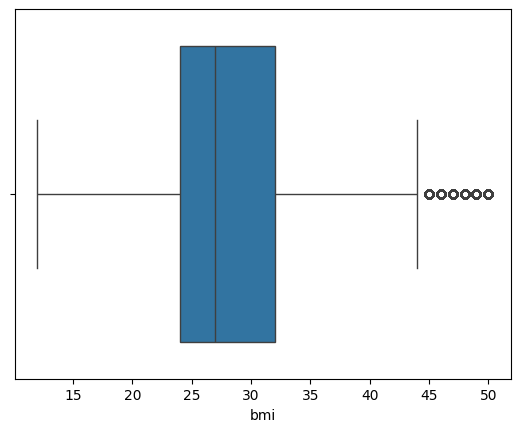

In [11]:
sns.boxplot(data=df_train, x='bmi')
plt.show()

En este gráfico, se observa mas detallada la variable 'BMI', lo que se puede decir a simple vista es que por encima de 40 hay valores, aún cuando la base se filtro para descartar tantos valores anomalos.


#### **4.3.1 Análisis Univariado**

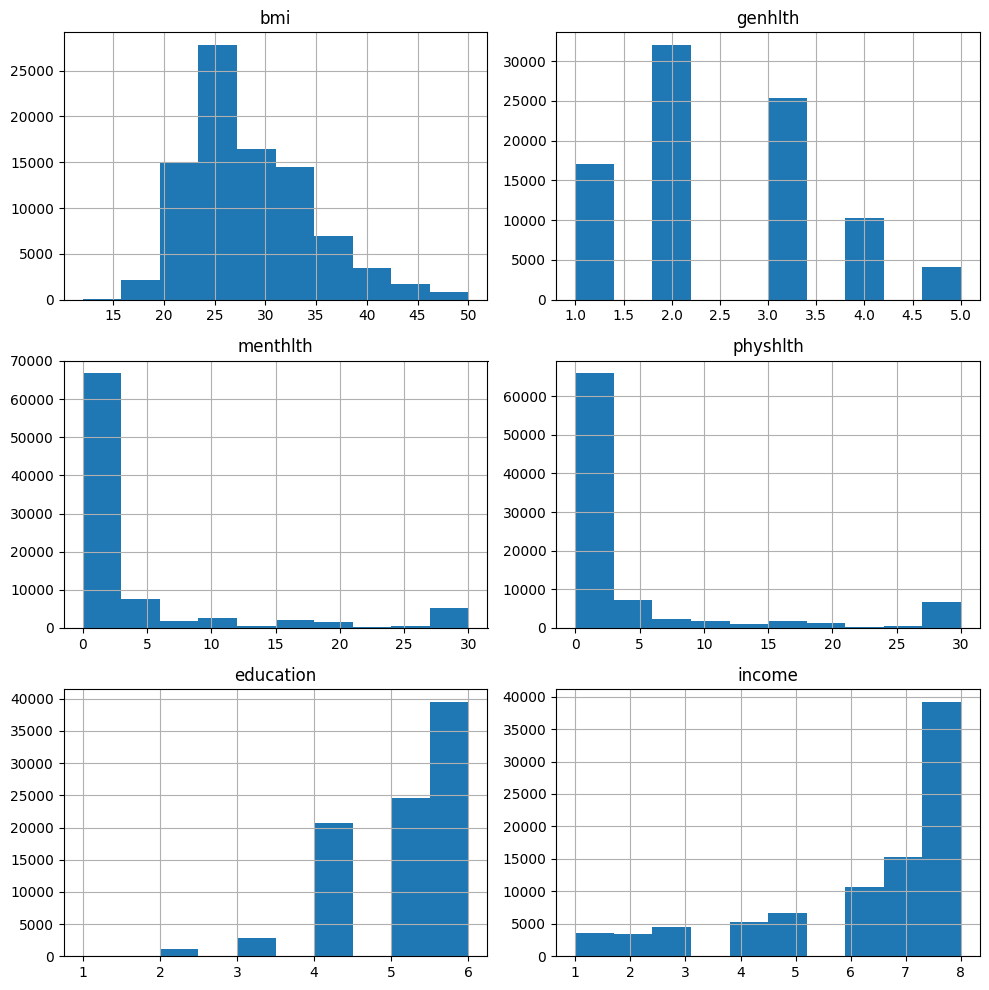

In [12]:
df_train.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

En el análisis univariado, se observa en detalle la distribución de las variables. 'BMI' sigue una distribución aproximadamente normal, aunque presenta una cola derecha debido a la presencia de valores atípicos. Por otro lado, 'menthlth' y 'physhlth' están fuertemente concentradas en 0, con una ligera cola derecha en sus distribuciones. Las variables ordinales exhiben una distribución multimodal.

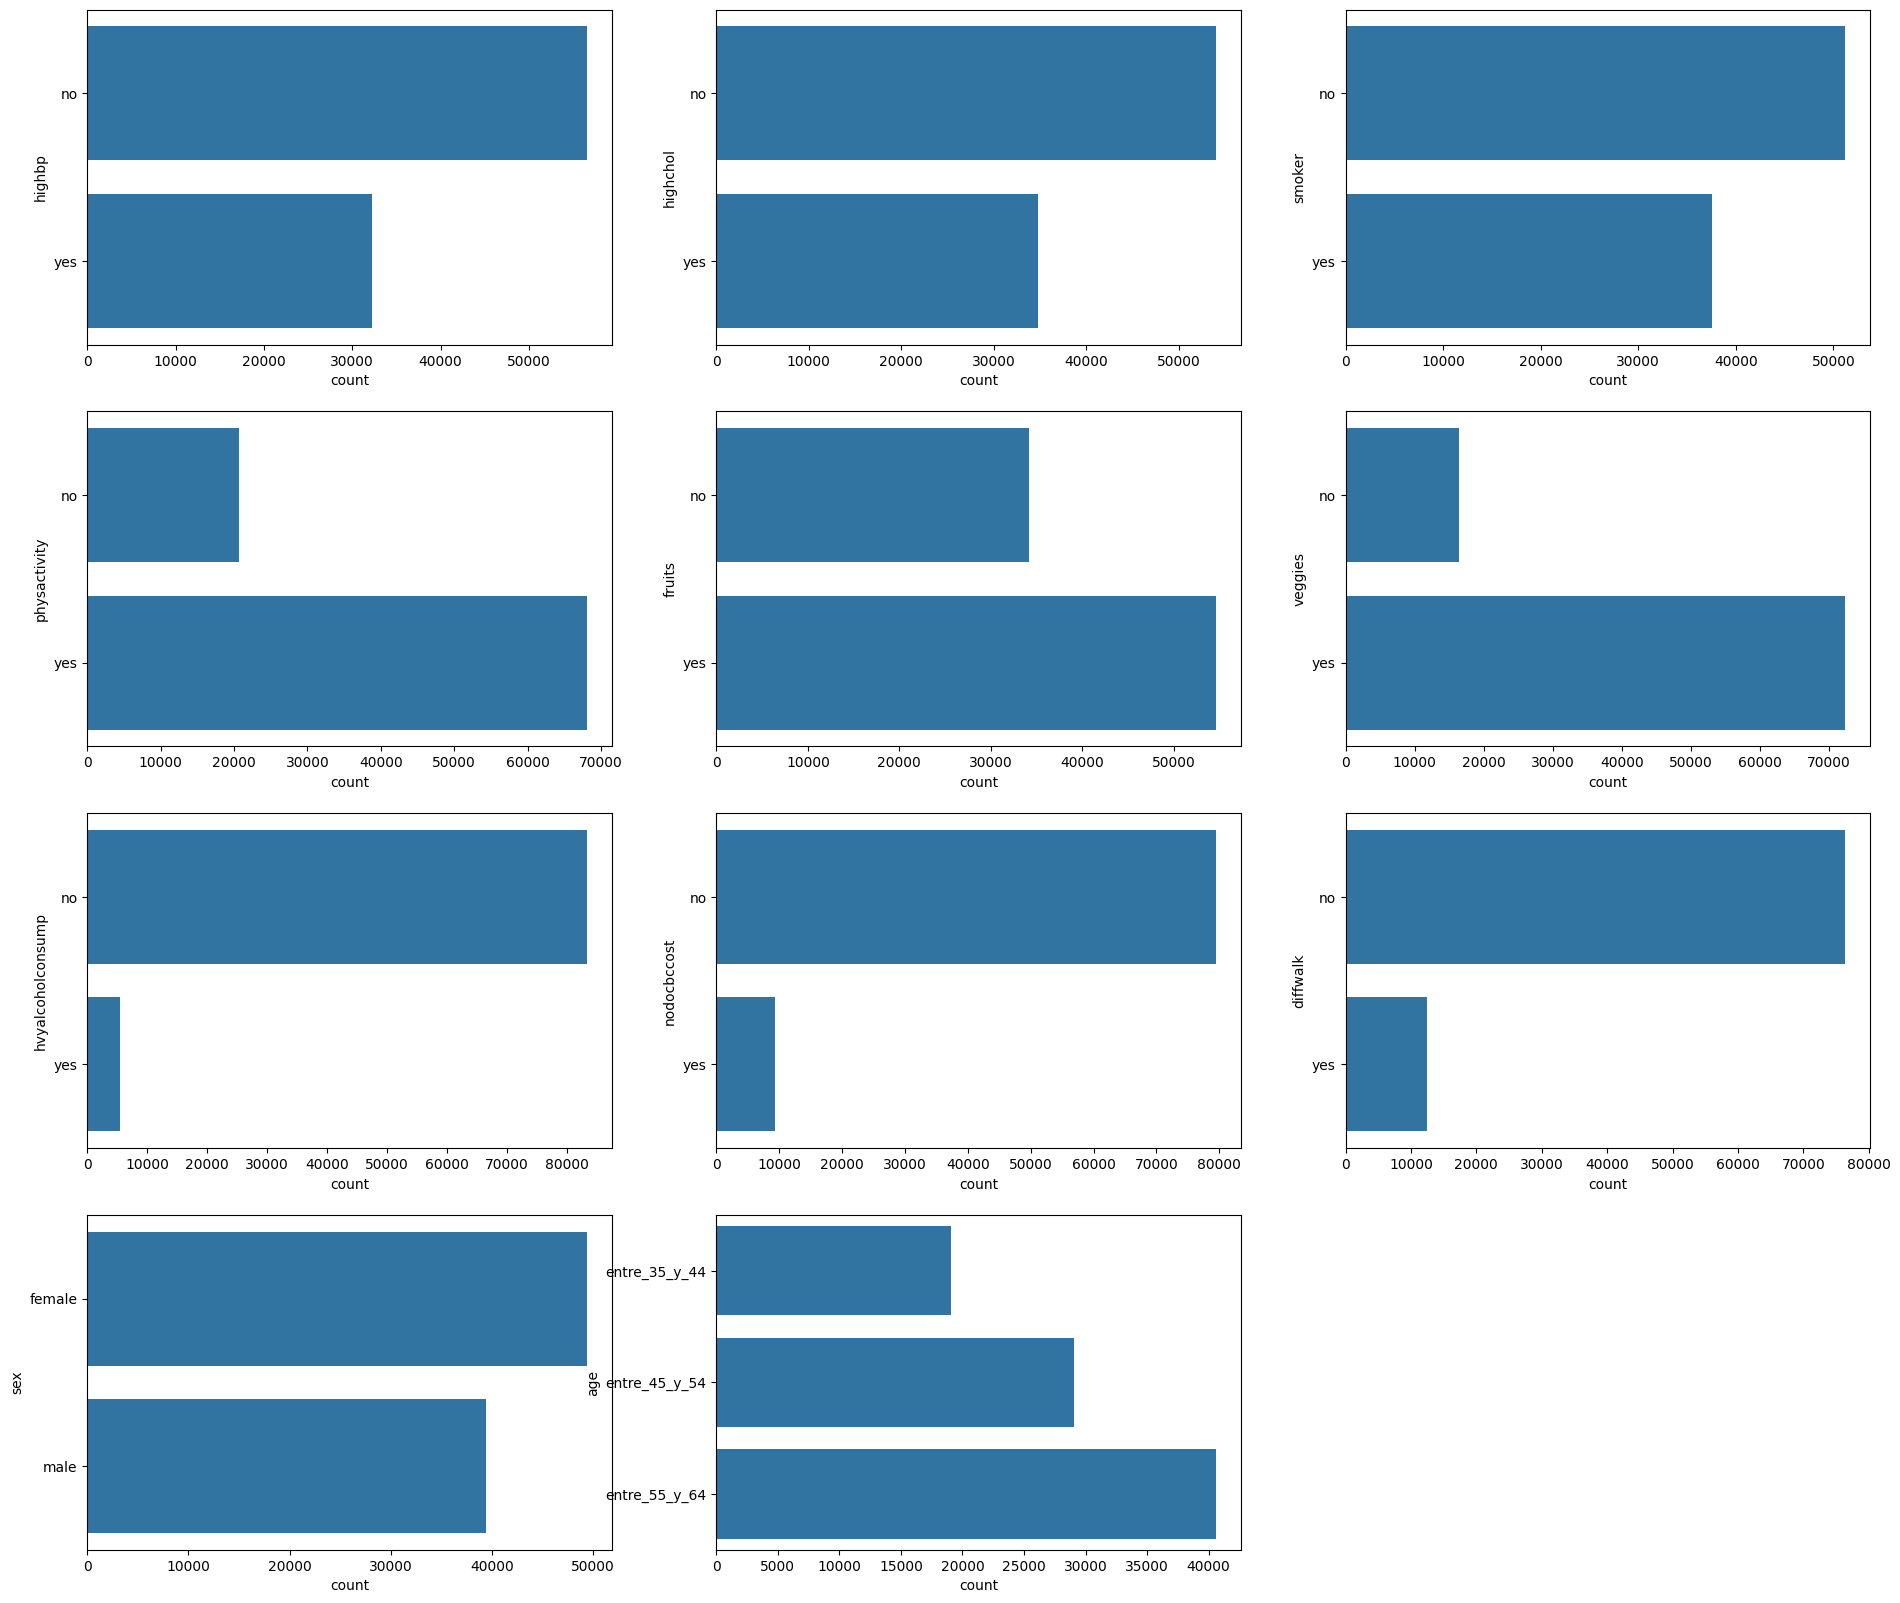

In [13]:
fig, ax = plt.subplots(4,3, figsize=(23,20))
sns.countplot(data = df_train, y = 'highbp', ax = ax[0,0])
sns.countplot(data = df_train, y = 'highchol', ax = ax[0,1])
sns.countplot(data = df_train, y = 'smoker', ax = ax[0,2])
sns.countplot(data = df_train, y = 'physactivity', ax = ax[1,0])
sns.countplot(data = df_train, y = 'fruits', ax = ax[1,1])
sns.countplot(data = df_train, y = 'veggies', ax = ax[1,2])
sns.countplot(data = df_train, y = 'hvyalcoholconsump', ax = ax[2,0])
sns.countplot(data = df_train, y = 'nodocbccost', ax = ax[2,1])
sns.countplot(data = df_train, y = 'diffwalk', ax = ax[2,2])
sns.countplot(data = df_train, y = 'sex', ax = ax[3,0])
sns.countplot(data = df_train, y = 'age', ax = ax[3,1])
# eliminar grafico vacio
ax[3,2].set_visible(False)
plt.show()

Los gráficos de las variables categóricas confirman lo señalado en la sección 'describe'. Se observa que algunas variables presentan un marcado desequilibrio, mientras que en otras las diferencias no son tan significativas.


##### **4.3.2 Bivariate Analysis**

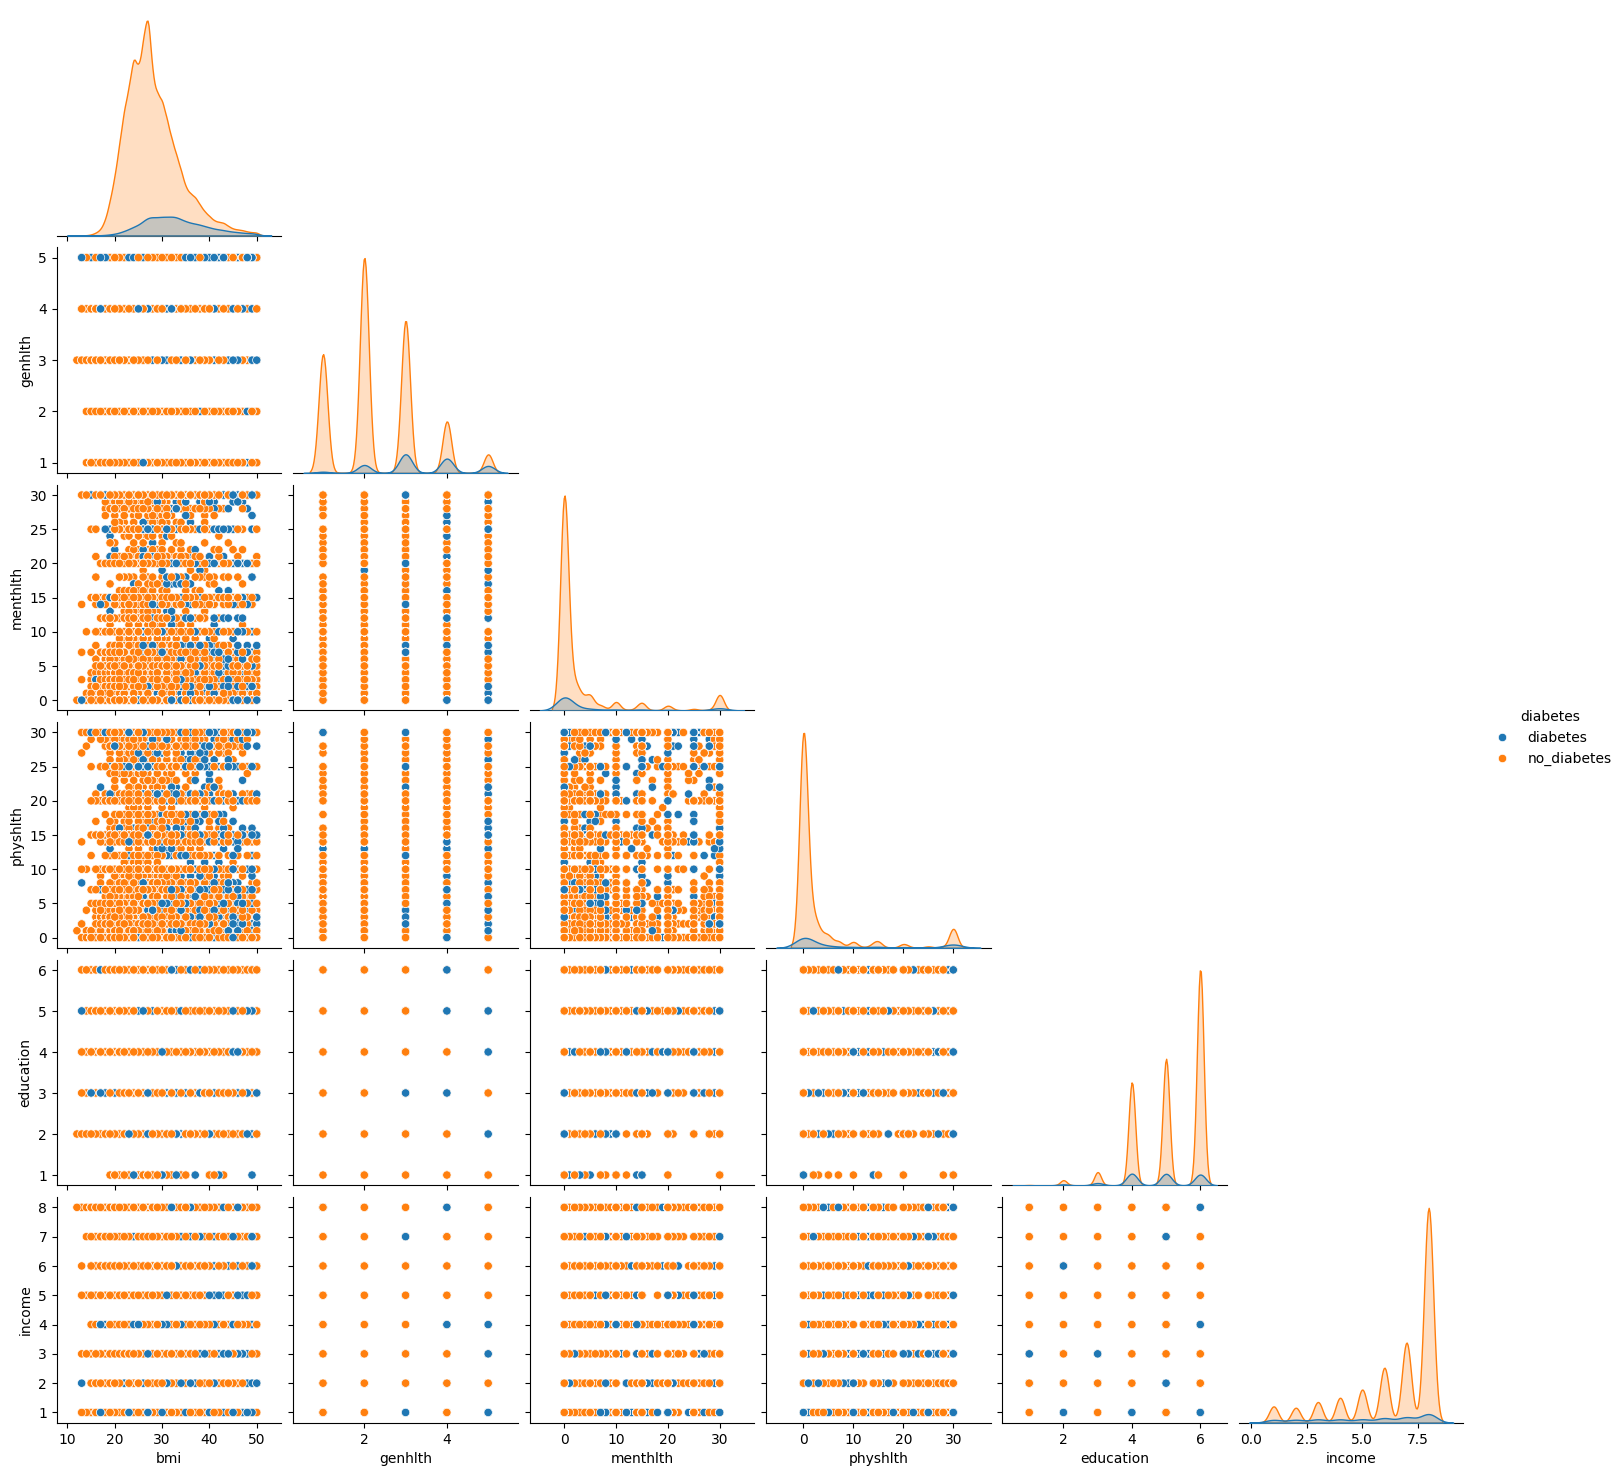

In [14]:
num = ['bmi', 'genhlth', 'menthlth', 'physhlth', 'age', 'education', 'income','diabetes']
sns.pairplot(df_train[num], hue='diabetes', corner=True)
plt.show()

En el análisis bivariado de las variables numéricas, no se visualiza ninguna relación aparente entre estas variables.

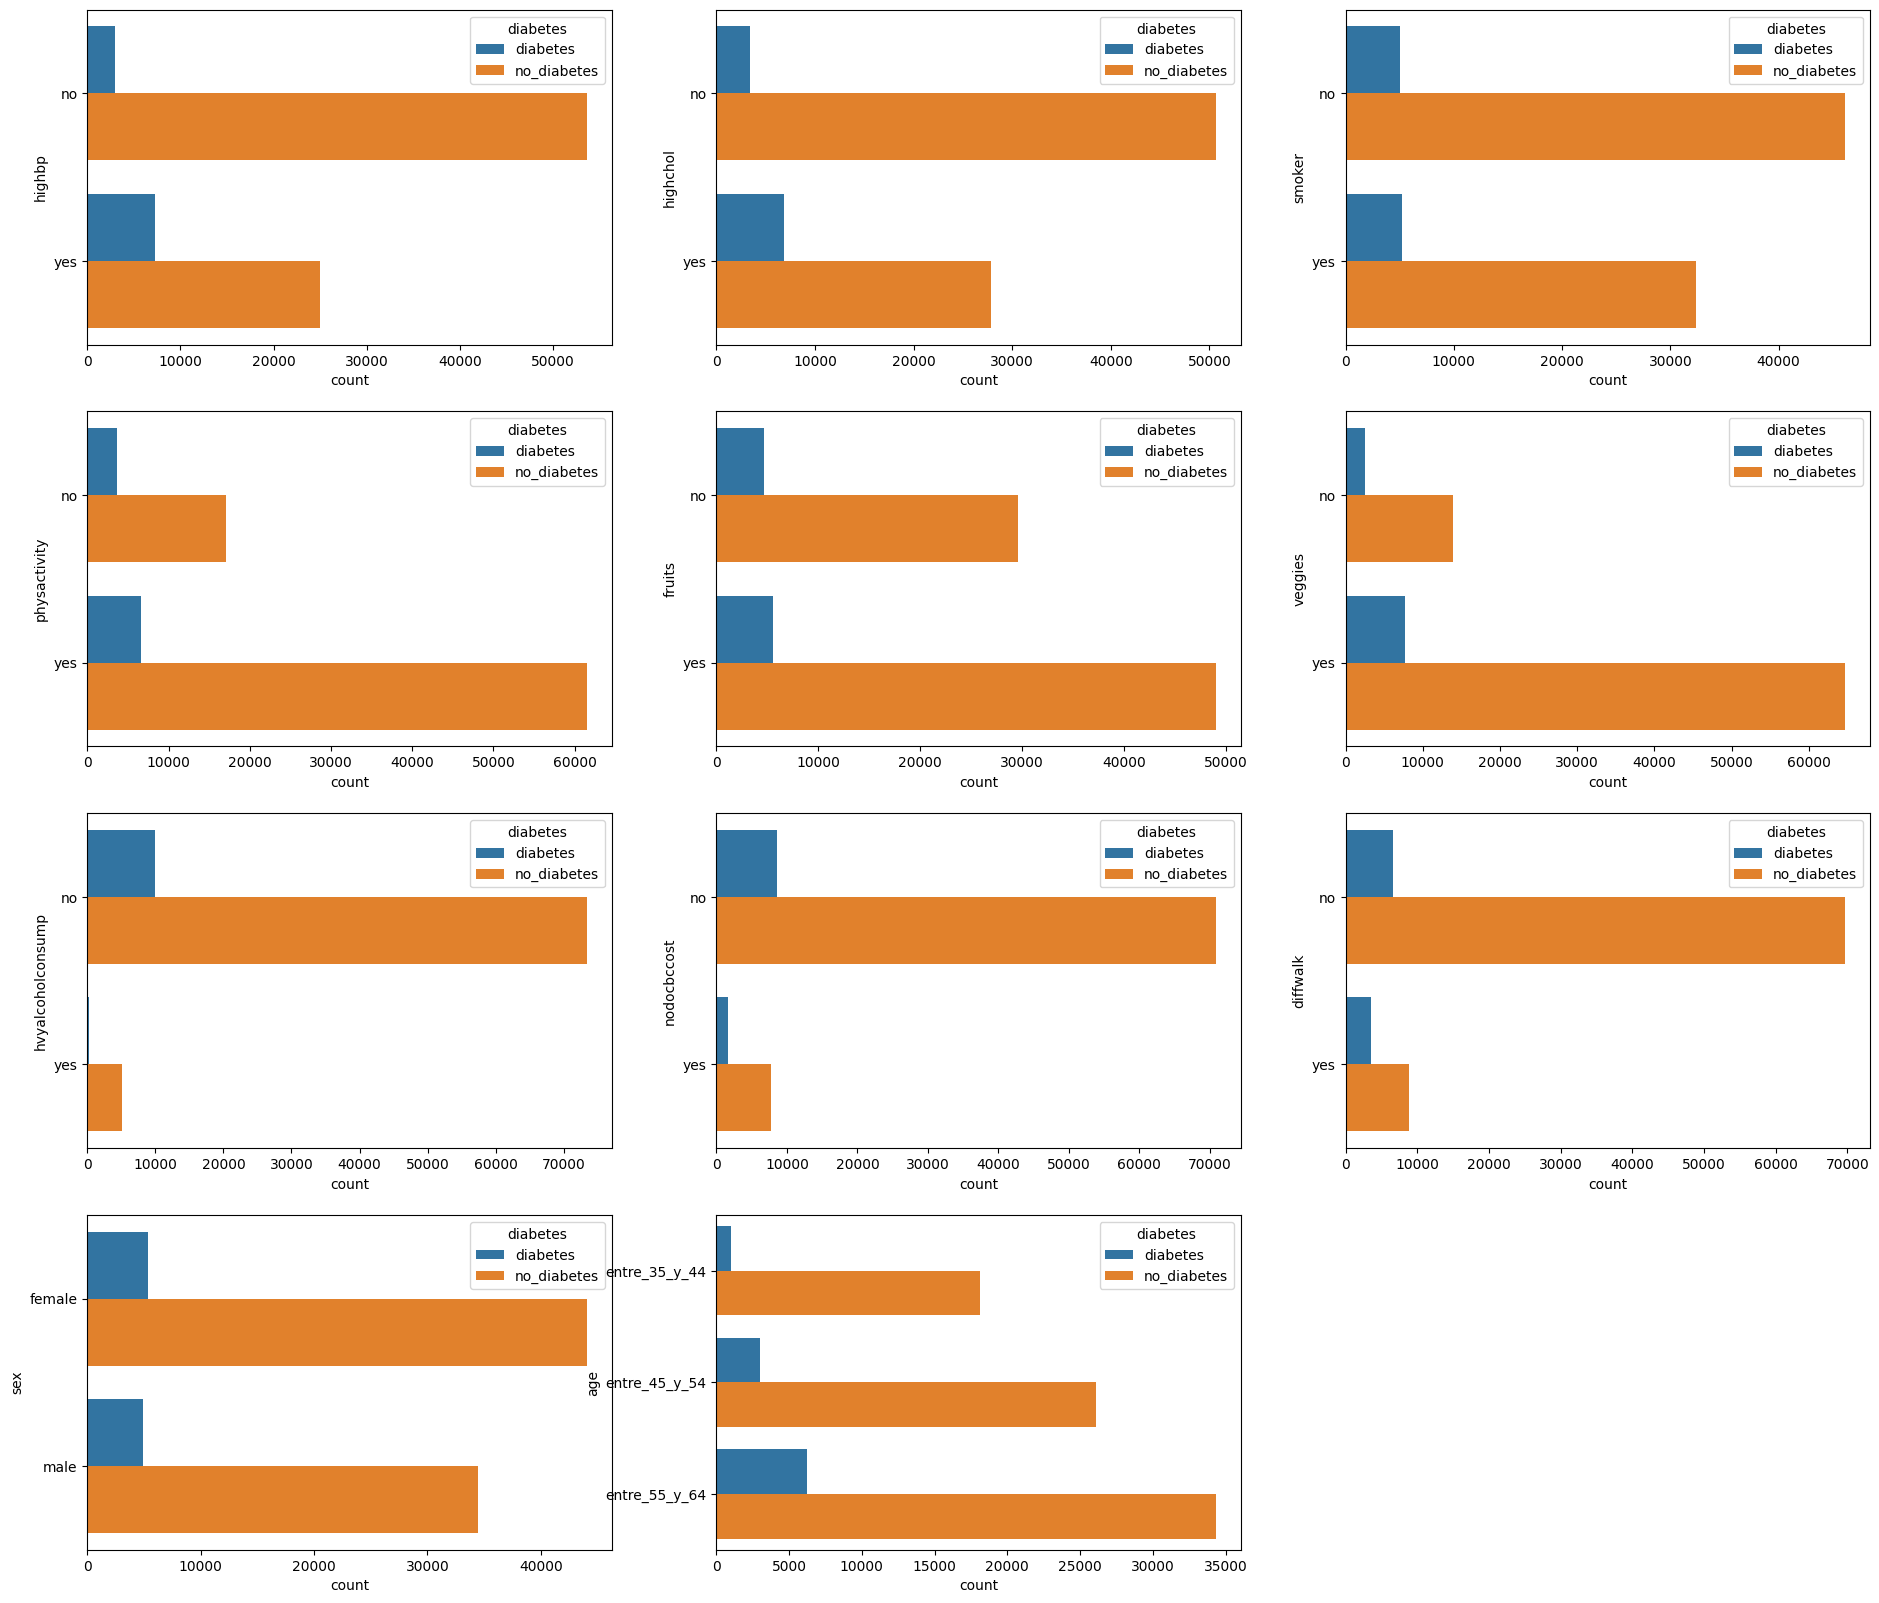

In [15]:
fig, ax = plt.subplots(4,3, figsize=(23,20))
sns.countplot(data = df_train, hue= 'diabetes', y = 'highbp', ax = ax[0,0])
sns.countplot(data = df_train, hue= 'diabetes', y = 'highchol', ax = ax[0,1])
sns.countplot(data = df_train, hue= 'diabetes', y = 'smoker', ax = ax[0,2])
sns.countplot(data = df_train, hue= 'diabetes', y = 'physactivity', ax = ax[1,0])
sns.countplot(data = df_train, hue= 'diabetes', y = 'fruits', ax = ax[1,1])
sns.countplot(data = df_train, hue= 'diabetes', y = 'veggies', ax = ax[1,2])
sns.countplot(data = df_train, hue= 'diabetes', y = 'hvyalcoholconsump', ax = ax[2,0])
sns.countplot(data = df_train, hue= 'diabetes', y = 'nodocbccost', ax = ax[2,1])
sns.countplot(data = df_train, hue= 'diabetes', y = 'diffwalk', ax = ax[2,2])
sns.countplot(data = df_train, hue= 'diabetes', y = 'sex', ax = ax[3,0])
sns.countplot(data = df_train, hue= 'diabetes', y = 'age', ax = ax[3,1])
# eliminar grafico vacio
ax[3,2].set_visible(False)
plt.show()

En el análisis bivariado, se observa que, en la mayoría de las variables, la clase mayoritaria presenta la mayor proporción de casos de diabetes. Algunos hallazgos interesantes incluyen la variable 'nodocbccost', donde la respuesta 'yes' está asociada a una baja representación de casos de diabetes en el gráfico de barras. En cuanto a 'sex', se nota que 'female' es la clase mayoritaria tanto entre personas con diabetes como sin ella. Por otro lado, en el gráfico de 'age', se evidencia un incremento en el número de casos de diabetes a medida que aumenta la edad, alcanzando su punto más alto en el grupo 'entre_55_y_64'.

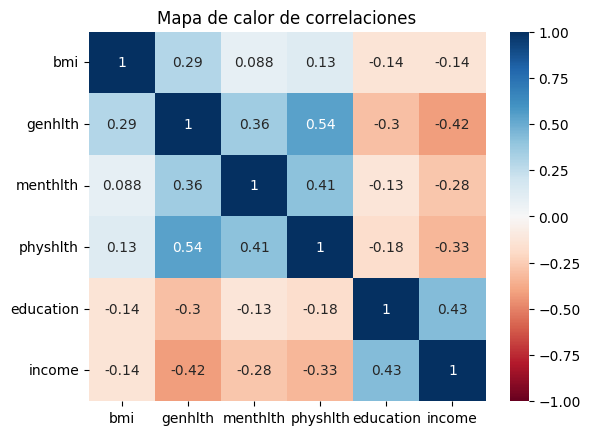

In [16]:
# Filtrar solo columnas numéricas
numericas = df_train.select_dtypes(include=['float']).columns

# Calcular la correlación para las columnas numéricas
corr_matrix = df_train[numericas].corr()

# Crear el heatmap
sns.heatmap(
    corr_matrix,
    vmin=-1, vmax=1, annot=True, cmap='RdBu'
)
plt.title('Mapa de calor de correlaciones')
plt.show()

La matriz de correlación no proporciona información significativa sobre la relación entre las variables. Esto se debe a que la mayoría de ellas son binarias o corresponden a escalas de satisfacción, lo que puede hacer que este método no sea el más adecuado para analizar sus interdependencias.

## **6. Desarrollo de modelos de machine learning**
**Objetivo**: Crear un modelo que aprenda de los datos para hacer predicciones y generalizar a datos desconocidos, y así realizar tareas sin instrucciones explícitas.

Estas son las mejores variables encontradas para reducir las dimensiones y optimizar el  modelo

In [17]:
X_train = df_train.drop('diabetes', axis=1)
y_train = df_train['diabetes']
X_val = df_val.drop('diabetes', axis=1)
y_val = df_val['diabetes']
X_test = df_test.drop('diabetes', axis=1)
y_test = df_test['diabetes']

In [18]:
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_val_enc = label_encoder.transform(y_val)
y_test_enc = label_encoder.transform(y_test)

In [19]:
cat_cols = X_train.select_dtypes("category").columns

num_cols = X_train.select_dtypes("number").columns
cat_proc = Pipeline([
    ("one_hot",OneHotEncoder(drop="first"))
])
num_proc = Pipeline([
    ("scaler",MinMaxScaler())
])
proccesor = ColumnTransformer([
    ("cat",cat_proc,cat_cols),
    ("num",num_proc,num_cols)
])

## **7. Comparación de modelos**

--------------------------------------------------------------------------------
Modelo 1
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


In [20]:
clf_histboost_p = Pipeline([
    ('proccesor', proccesor),
    ('histboost', HistGradientBoostingClassifier(random_state=2025, class_weight='balanced'))
])

In [21]:
param_distributions = {
    'histboost__max_iter': [50, 80, 100],  # Número de iteraciones
    'histboost__learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'histboost__max_depth': [None, 3, 4, 5]  # Profundidad máxima
}

# Aplicar RandomizedSearchCV
clf_histboost_cv = RandomizedSearchCV(
    clf_histboost_p,
    param_distributions=param_distributions,
    #n_iter=10,  # Número de combinaciones a probar
    cv=5,  # Validación cruzada
    scoring='recall',  # Métrica de evaluación
    n_jobs=-1,  # Paralelización
    random_state=42
)

clf_histboost_cv.fit(X_train, y_train_enc)
clf_histboost_cv.best_params_

{'histboost__max_iter': 100,
 'histboost__max_depth': 5,
 'histboost__learning_rate': 0.2}

accuracy: 0.74
f1_score: 0.79
matthews_corrcoef: 0.35
              precision    recall  f1-score   support

    diabetes       0.28      0.78      0.41      2559
 no_diabetes       0.96      0.74      0.83     19632

    accuracy                           0.74     22191
   macro avg       0.62      0.76      0.62     22191
weighted avg       0.88      0.74      0.79     22191



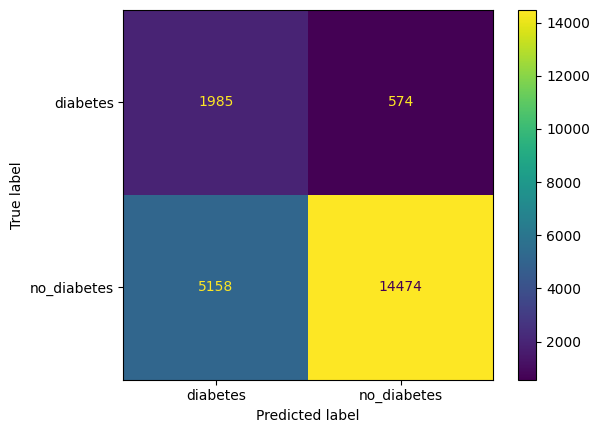

In [22]:
y_hat_val = clf_histboost_cv.best_estimator_.predict(X_val)
print(f'accuracy: {accuracy_score(y_val_enc, y_hat_val):.2f}')
print(f"f1_score: {f1_score(y_val_enc, y_hat_val, average='weighted'):.2f}")
print(f'matthews_corrcoef: {matthews_corrcoef(y_val_enc, y_hat_val):.2f}')
print(classification_report(y_val_enc,y_hat_val,target_names= label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_val_enc, y_hat_val, display_labels= label_encoder.classes_)
plt.show()

accuracy: 0.74
f1_score: 0.78
matthews_corrcoef: 0.35
Recall de diabetes: 0.77
Recall de no_diabetes: 0.74
              precision    recall  f1-score   support

    diabetes       0.28      0.77      0.41      3199
 no_diabetes       0.96      0.74      0.83     24540

    accuracy                           0.74     27739
   macro avg       0.62      0.75      0.62     27739
weighted avg       0.88      0.74      0.78     27739



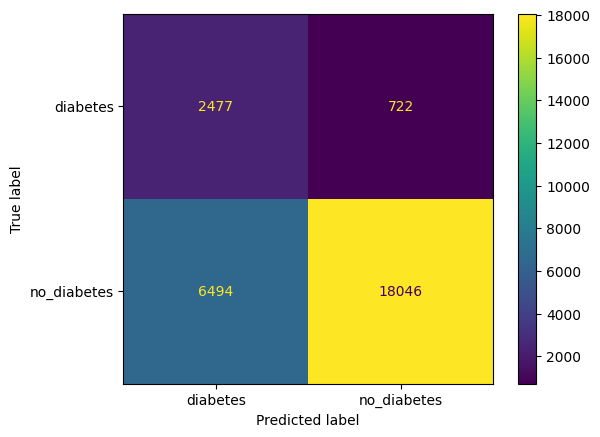

In [23]:
y_hat_test = clf_histboost_cv.best_estimator_.predict(X_test)
print(f'accuracy: {accuracy_score(y_test_enc, y_hat_test):.2f}')
print(f"f1_score: {f1_score(y_test_enc, y_hat_test, average='weighted'):.2f}")
print(f'matthews_corrcoef: {matthews_corrcoef(y_test_enc, y_hat_test):.2f}')
# Calcular el recall por cada clase
recall_por_clase = recall_score(y_test_enc, y_hat_test, average=None)
# Imprimir el recall por cada clase junto con los nombres
for clase, recall in zip(label_encoder.classes_, recall_por_clase):
    print(f"Recall de {clase}: {recall:.2f}")

print(classification_report(y_test_enc,y_hat_test,target_names= label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_test_enc, y_hat_test, display_labels= label_encoder.classes_)
plt.show()

* Accuracy (0.74): El modelo acierta el 74% de las veces.

* F1-score (0.78): Buen equilibrio entre precisión y recall.

* MCC (0.35): Correlación moderada entre predicciones y realidad.

* Recall diabetes (0.77): Captura bien los casos de diabetes.

* Recall no diabetes (0.74): Identifica la mayoría de los no diabéticos.

--------------------------------------------------------------------------------
Modelo 2
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


In [24]:
xgb_pipeline = Pipeline([
    ("preprocessor", proccesor),
    ("classifier", XGBClassifier(eval_metric='aucpr', random_state=2025,scale_pos_weight=len(y_train_enc[y_train_enc == 0]) / len(y_train_enc[y_train_enc == 1])))
])

In [25]:
param_distributions = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [3, 5, 7, 10],
    "classifier__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "classifier__subsample": [0.6, 0.8, 1.0],
    "classifier__colsample_bytree": [0.6, 0.8, 1.0],
    "classifier__gamma": [0, 1, 5],
    "classifier__scale_pos_weight": [1, 5, 10, 20]  # Valores de prueba para el peso de clases
}

# Usarlo en RandomizedSearchCV
clf_xgb_cv = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=-1,
    random_state=2025
)


clf_xgb_cv.fit(X_train, y_train_enc)
clf_xgb_cv.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END classifier__colsample_bytree=0.8, classifier__gamma=5, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=300, classifier__scale_pos_weight=10, classifier__subsample=0.6; total time=   2.9s
[CV] END classifier__colsample_bytree=0.8, classifier__gamma=5, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=300, classifier__scale_pos_weight=10, classifier__subsample=0.6; total time=   3.0s
[CV] END classifier__colsample_bytree=0.8, classifier__gamma=5, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=300, classifier__scale_pos_weight=10, classifier__subsample=0.6; total time=   2.4s
[CV] END classifier__colsample_bytree=0.8, classifier__gamma=5, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=300, classifier__scale_pos_weight=10, classifier__subsample=0.6; total time=   2.4s
[CV] END classifie

{'classifier__subsample': 0.8,
 'classifier__scale_pos_weight': 1,
 'classifier__n_estimators': 100,
 'classifier__max_depth': 3,
 'classifier__learning_rate': 0.05,
 'classifier__gamma': 5,
 'classifier__colsample_bytree': 1.0}

accuracy: 0.89
f1_score: 0.85
matthews_corrcoef: 0.22
              precision    recall  f1-score   support

    diabetes       0.57      0.11      0.19      2559
 no_diabetes       0.90      0.99      0.94     19632

    accuracy                           0.89     22191
   macro avg       0.73      0.55      0.57     22191
weighted avg       0.86      0.89      0.85     22191



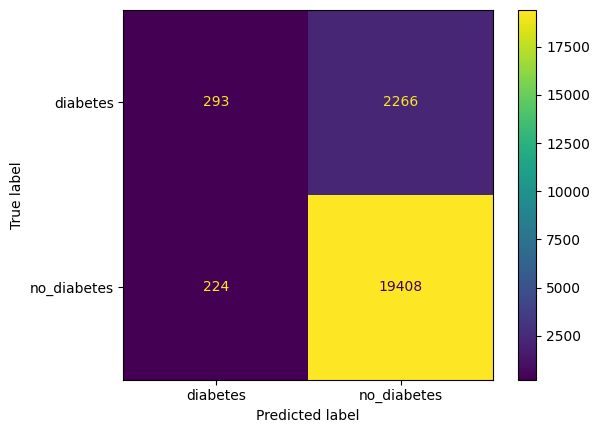

In [26]:
y_hat_val = clf_xgb_cv.best_estimator_.predict(X_val)
print(f'accuracy: {accuracy_score(y_val_enc, y_hat_val):.2f}')
print(f"f1_score: {f1_score(y_val_enc, y_hat_val, average='weighted'):.2f}")
print(f'matthews_corrcoef: {matthews_corrcoef(y_val_enc, y_hat_val):.2f}')
print(classification_report(y_val_enc,y_hat_val,target_names= label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_val_enc, y_hat_val, display_labels= label_encoder.classes_)
plt.show()

accuracy: 0.89
f1_score: 0.85
matthews_corrcoef: 0.22
Recall de diabetes: 0.11
Recall de no_diabetes: 0.99
              precision    recall  f1-score   support

    diabetes       0.58      0.11      0.19      3199
 no_diabetes       0.90      0.99      0.94     24540

    accuracy                           0.89     27739
   macro avg       0.74      0.55      0.57     27739
weighted avg       0.86      0.89      0.85     27739



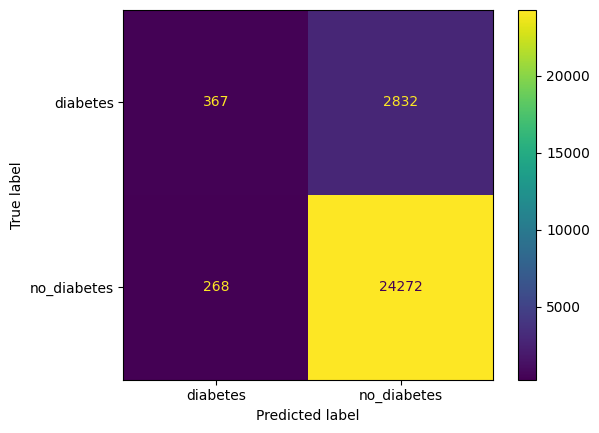

In [27]:
y_hat_test = clf_xgb_cv.best_estimator_.predict(X_test)
print(f'accuracy: {accuracy_score(y_test_enc, y_hat_test):.2f}')
print(f"f1_score: {f1_score(y_test_enc, y_hat_test, average='weighted'):.2f}")
print(f'matthews_corrcoef: {matthews_corrcoef(y_test_enc, y_hat_test):.2f}')
recall_por_clase = recall_score(y_test_enc, y_hat_test, average=None)
# Imprimir el recall por cada clase junto con los nombres
for clase, recall in zip(label_encoder.classes_, recall_por_clase):
    print(f"Recall de {clase}: {recall:.2f}")
print(classification_report(y_test_enc,y_hat_test,target_names= label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_test_enc, y_hat_test, display_labels= label_encoder.classes_)
plt.show()

* Accuracy (0.89): El modelo acierta el 89% de las veces.

* F1-score (0.85): Buen equilibrio entre precisión y recall.

* MCC (0.22): Correlación baja entre predicciones y realidad.

* Recall diabetes (0.11): Captura muy poco los casos de diabetes.

* Recall no diabetes (0.99): Identifica todos los no diabéticos.

--------------------------------------------------------------------------------
Modelo 3
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


In [28]:
clf_rforest_p = Pipeline([
    ('proccesor', proccesor),
    ('rforest', RandomForestClassifier(class_weight='balanced', random_state=2025))
])

In [29]:
clf_rforest_cv = RandomizedSearchCV(
    clf_rforest_p,
    param_distributions= {
        'rforest__n_estimators': [100,150,200],
        'rforest__criterion': ["gini", "entropy"],
        'rforest__max_depth': [None, 3,4,5]
    },
    #n_iter=10,
    cv=5,
    scoring='f1_weighted',
    n_jobs=4, #cambiar 4
    random_state=2025
)
clf_rforest_cv.fit(X_train, y_train_enc)
clf_rforest_cv.best_params_

{'rforest__n_estimators': 150,
 'rforest__max_depth': None,
 'rforest__criterion': 'entropy'}

accuracy: 0.88
f1_score: 0.85
matthews_corrcoef: 0.18
              precision    recall  f1-score   support

    diabetes       0.39      0.14      0.21      2559
 no_diabetes       0.90      0.97      0.93     19632

    accuracy                           0.88     22191
   macro avg       0.64      0.56      0.57     22191
weighted avg       0.84      0.88      0.85     22191



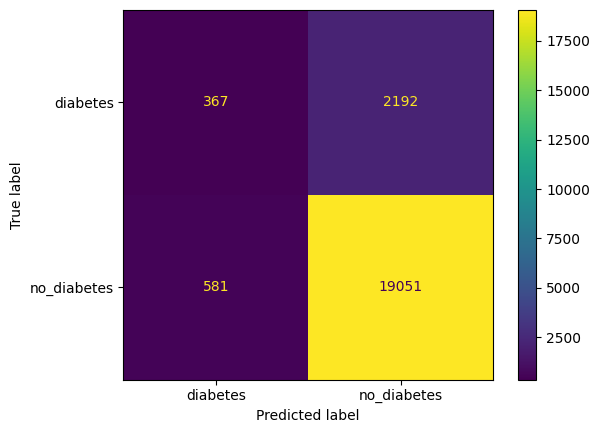

In [30]:
y_hat_val = clf_rforest_cv.best_estimator_.predict(X_val)
print(f'accuracy: {accuracy_score(y_val_enc, y_hat_val):.2f}')
print(f"f1_score: {f1_score(y_val_enc, y_hat_val, average='weighted'):.2f}")
print(f'matthews_corrcoef: {matthews_corrcoef(y_val_enc, y_hat_val):.2f}')
print(classification_report(y_val_enc,y_hat_val,target_names= label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_val_enc, y_hat_val, display_labels= label_encoder.classes_)
plt.show()

accuracy: 0.87
f1_score: 0.85
matthews_corrcoef: 0.19
Recall de diabetes: 0.16
Recall de no_diabetes: 0.97
              precision    recall  f1-score   support

    diabetes       0.39      0.16      0.22      3199
 no_diabetes       0.90      0.97      0.93     24540

    accuracy                           0.87     27739
   macro avg       0.65      0.56      0.58     27739
weighted avg       0.84      0.87      0.85     27739



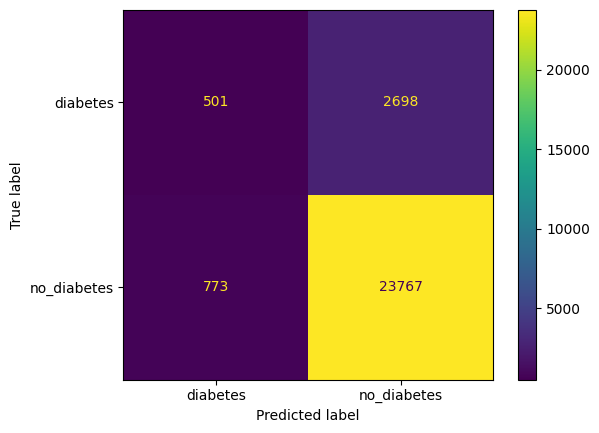

In [31]:
y_hat_test = clf_rforest_cv.best_estimator_.predict(X_test)
print(f'accuracy: {accuracy_score(y_test_enc, y_hat_test):.2f}')
print(f"f1_score: {f1_score(y_test_enc, y_hat_test, average='weighted'):.2f}")
print(f'matthews_corrcoef: {matthews_corrcoef(y_test_enc, y_hat_test):.2f}')
recall_por_clase = recall_score(y_test_enc, y_hat_test, average=None)
# Imprimir el recall por cada clase junto con los nombres
for clase, recall in zip(label_encoder.classes_, recall_por_clase):
    print(f"Recall de {clase}: {recall:.2f}")
print(classification_report(y_test_enc,y_hat_test,target_names= label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_test_enc, y_hat_test, display_labels= label_encoder.classes_)
plt.show()

* Accuracy (0.87): El modelo acierta el 87% de las veces.

* F1-score (0.85): Buen equilibrio entre precisión y recall.

* MCC (0.19): Correlación bastante baja entre predicciones y realidad.

* Recall diabetes (0.16): Captura muy poco los casos de diabetes.

* Recall no diabetes (0.97): Identifica todos los no diabéticos.

--------------------------------------------------------------------------------
Modelo 4
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


In [32]:
clf_histboost_p_smote = ImbPipeline([
    ('proccesor', proccesor),  # Tu transformador de datos
    ('smote', SMOTE(random_state=2025)),
    ('histboost', HistGradientBoostingClassifier(random_state=2025))
])

In [33]:
param_distributions = {
    'histboost__max_iter': [100, 200, 300],
    'histboost__learning_rate': [0.01, 0.05, 0.1],
    'histboost__max_depth': [3, 4, 5, None],
}

clf_histboost_cv_smote = RandomizedSearchCV(
    clf_histboost_p_smote,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=2025
)

clf_histboost_cv_smote.fit(X_train, y_train_enc)

clf_histboost_cv_smote.best_params_

{'histboost__max_iter': 300,
 'histboost__max_depth': 4,
 'histboost__learning_rate': 0.05}

accuracy: 0.88
f1_score: 0.87
matthews_corrcoef: 0.31
              precision    recall  f1-score   support

    diabetes       0.46      0.30      0.37      2559
 no_diabetes       0.91      0.95      0.93     19632

    accuracy                           0.88     22191
   macro avg       0.69      0.63      0.65     22191
weighted avg       0.86      0.88      0.87     22191



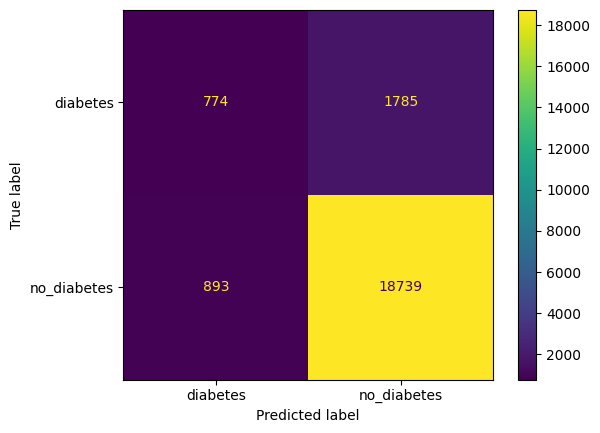

In [34]:
y_hat_val = clf_histboost_cv_smote.best_estimator_.predict(X_val)
print(f'accuracy: {accuracy_score(y_val_enc, y_hat_val):.2f}')
print(f"f1_score: {f1_score(y_val_enc, y_hat_val, average='weighted'):.2f}")
print(f'matthews_corrcoef: {matthews_corrcoef(y_val_enc, y_hat_val):.2f}')
print(classification_report(y_val_enc,y_hat_val,target_names= label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_val_enc, y_hat_val, display_labels= label_encoder.classes_)
plt.show()

accuracy: 0.88
f1_score: 0.87
matthews_corrcoef: 0.31
Recall de diabetes: 0.31
Recall de no_diabetes: 0.95
              precision    recall  f1-score   support

    diabetes       0.45      0.31      0.37      3199
 no_diabetes       0.91      0.95      0.93     24540

    accuracy                           0.88     27739
   macro avg       0.68      0.63      0.65     27739
weighted avg       0.86      0.88      0.87     27739



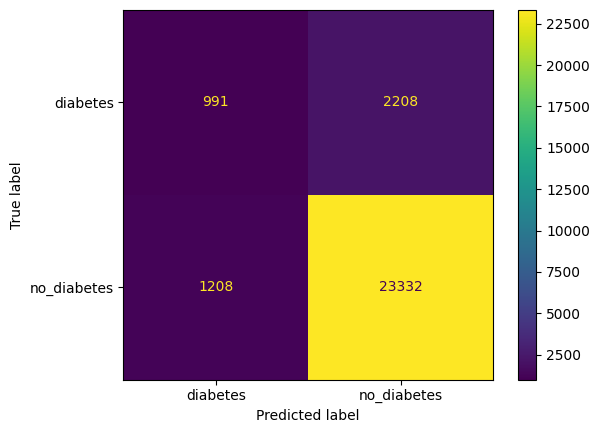

In [35]:
y_hat_test = clf_histboost_cv_smote.best_estimator_.predict(X_test)
print(f'accuracy: {accuracy_score(y_test_enc, y_hat_test):.2f}')
print(f"f1_score: {f1_score(y_test_enc, y_hat_test, average='weighted'):.2f}")
print(f'matthews_corrcoef: {matthews_corrcoef(y_test_enc, y_hat_test):.2f}')
recall_por_clase = recall_score(y_test_enc, y_hat_test, average=None)
# Imprimir el recall por cada clase junto con los nombres
for clase, recall in zip(label_encoder.classes_, recall_por_clase):
    print(f"Recall de {clase}: {recall:.2f}")
print(classification_report(y_test_enc,y_hat_test,target_names= label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_test_enc, y_hat_test, display_labels= label_encoder.classes_)
plt.show()

* Accuracy (0.88): El modelo acierta el 88% de las veces.

* F1-score (0.87): Buen equilibrio entre precisión y recall.

* MCC (0.31): Correlación buena entre predicciones y realidad.

* Recall diabetes (0.31): Captura la mitad de los casos de diabetes.

* Recall no diabetes (0.95): Identifica la mayoría de los no diabéticos.

## **8. Visualización del modelo**

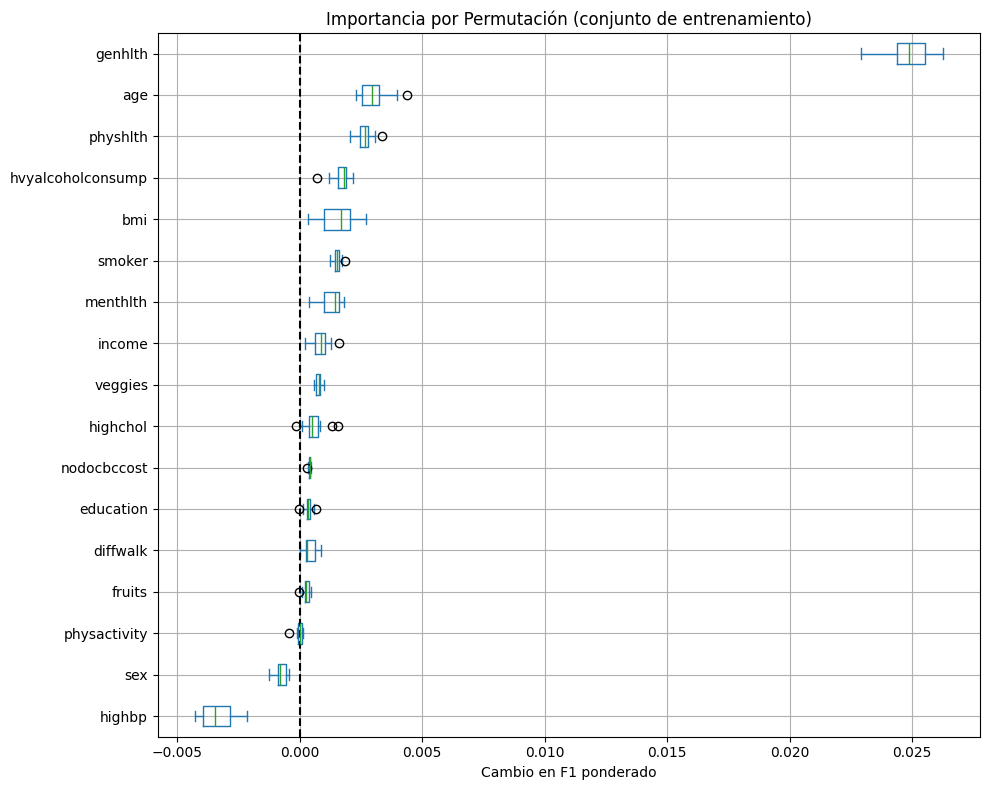

Top 5 variables más importantes:
 genhlth              0.024853
age                  0.002952
physhlth             0.002681
hvyalcoholconsump    0.001803
bmi                  0.001701
dtype: float64


In [36]:
# Importancia por permutación con modelo óptimo
importance = permutation_importance(
    clf_histboost_cv.best_estimator_,
    X_train,
    y_train_enc,
    n_repeats=15,
    random_state=42,
    n_jobs=-1
)

# DataFrame de importancias
importance_df = pd.DataFrame(importance.importances.T, columns=X_train.columns)

# Ordenar por importancia mediana
median_importances = importance_df.median().sort_values(ascending=True)
importance_df = importance_df[median_importances.index]

# Boxplot
fig, ax = plt.subplots(figsize=(10, 8))
importance_df.plot.box(vert=False, ax=ax)
ax.axvline(x=0, color="k", linestyle="--")
ax.set_title("Importancia por Permutación (conjunto de entrenamiento)")
ax.set_xlabel("Cambio en F1 ponderado")
ax.grid(True)
plt.tight_layout()
plt.show()

top_vars = median_importances.sort_values(ascending=False).head(5)
print("Top 5 variables más importantes:\n", top_vars)


El análisis identifica las cinco variables más influyentes en el modelo, proporcionando información clave sobre los factores que pueden estar relacionados con la diabetes:

1. **Genhlth (Salud General) – 0.024335**  
   - La variable con mayor peso en el análisis, lo que sugiere que la percepción general de la salud podría ser un fuerte predictor de diabetes. 

2. **Physhlth (Días de problemas físicos en el último mes) – 0.003842**  
   - Este indicador refleja el impacto físico de la enfermedad en la calidad de vida del paciente. Un mayor número de días con problemas físicos podría correlacionarse con complicaciones derivadas de la diabetes.  

3. **BMI (Índice de Masa Corporal) – 0.003380**  
   - La obesidad es uno de los principales factores de riesgo para el desarrollo de diabetes tipo 2. Un IMC elevado suele estar asociado con resistencia a la insulina y problemas metabólicos.  

4. **Age (Edad) – 0.002219**  
   - La edad juega un papel crucial en la diabetes, ya que el riesgo de desarrollar la enfermedad aumenta significativamente con el envejecimiento.

5. **HvyAlcoholConsump (Consumo excesivo de alcohol) – 0.001577**  
   - Aunque el consumo de alcohol no siempre está directamente asociado con la diabetes, su abuso puede influir negativamente en el metabolismo y la resistencia a la insulina. También puede contribuir al aumento de peso, otro factor de riesgo clave.  


In [37]:
modelos = {
    "Modelo_histboost": clf_histboost_cv.best_estimator_.predict(X_test), # mejor modelo
    "Modelo_histboost_smote": clf_histboost_cv_smote.best_estimator_.predict(X_test),
    "Modelo_xgb": clf_xgb_cv.best_estimator_.predict(X_test),
    "Modelo_rforest": clf_rforest_cv.best_estimator_.predict(X_test),
}

# Crear un DataFrame para almacenar los resultados
metricas_lista = []

for nombre_modelo, y_pred in modelos.items():
    accuracy = accuracy_score(y_test_enc, y_pred)
    f1 = f1_score(y_test_enc, y_pred, average="weighted")
    mcc = matthews_corrcoef(y_test_enc, y_pred)
    precision_por_clase = precision_score(y_test_enc, y_pred, average=None)
    recall_por_clase = recall_score(y_test_enc, y_pred, average=None)

    metricas_dict = {
        "Modelo": nombre_modelo,
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Matthews CorrCoef": mcc
    }

    # Agregar el recall y la precisión por clase
    for clase, precision, recall in zip(label_encoder.classes_, precision_por_clase, recall_por_clase):
        metricas_dict[f"Precision_{clase}"] = precision
        metricas_dict[f"Recall_{clase}"] = recall

    metricas_lista.append(metricas_dict)

# Convertir a DataFrame
df_metricas = pd.DataFrame(metricas_lista)

# Guardar en CSV
df_metricas.to_csv("metricas_modelos.csv", index=False)

print("Métricas guardadas en metricas_modelos.csv")

Métricas guardadas en metricas_modelos.csv


In [38]:
df_metricas

,Modelo,Accuracy,F1-Score,Matthews CorrCoef,Precision_diabetes,Recall_diabetes,Precision_no_diabetes,Recall_no_diabetes
0,Modelo_histboost,0.739861,0.784215,0.348023,0.276112,0.774304,0.961530,0.735371
1,Modelo_histboost_smote,0.876852,0.866675,0.308054,0.450659,0.309784,0.913547,0.950774
2,Modelo_xgb,0.888244,0.853650,0.221691,0.577953,0.114723,0.895514,0.989079
3,Modelo_rforest,0.874869,0.850305,0.190907,0.393250,0.156611,0.898054,0.968500


## **9.Conclusiones y Recomendaciones**
El mejor modelo que se encontro fue el modelo 1, usando el algoritmo HistGradientBoostingClassifier.Estos resultados ofrecen una visión clara del desempeño del modelo en la clasificación de diabetes.

#### **Rendimiento general**
- La **exactitud (accuracy) del 74%** indica un desempeño aceptable.
- La **F1-score de 0.78** refleja un buen equilibrio entre precisión y sensibilidad.

#### **Análisis de clasificación**
- El **recall de 0.77** para la categoría de diabetes sugiere que el modelo identifica correctamente la mayoría de los pacientes con diabetes.
- Sin embargo, la **precisión para diabetes es baja (0.27)**, lo que significa que hay muchos falsos positivos.
- La categoría **"no diabetes" tiene un recall de 0.73 y una precisión de 0.96**, lo que indica que el modelo identifica bien a los pacientes sanos, pero puede estar sobreestimando la cantidad de personas sin diabetes.

#### **Matthews Correlation Coefficient (MCC)**
- El **MCC de 0.34** indica una correlación aceptable entre las predicciones y los valores reales.

En resumen, el modelo es efectivo en la detección de pacientes con diabetes, pero con baja precisión en esa clase.


## **10. Referencias**

* [1] Diabetes World Health Organization. (9 de Abril del 2025). *Definicion de la diabetes*, enlace https://www.who.int/es/news-room/fact-sheets/detail/diabetes
* [2] National Institute of Diabetes and Digestive and Kidney Disease (NIH). (9 Abril del 2025). *¿Qué es la Diabetes?*, enlace https://www.niddk.nih.gov/health-information/informacion-de-la-salud/diabetes/informacion-general/que-es
* [3] Share Care. (9 Abril del 2025). *The Cost of Diabetes in the U.S.: Economic and Well-Being Impact*, enlace https://wellbeingindex-sharecare-com.translate.goog/diabetes-us-economic-well-being-impact/?_x_tr_sl=en&_x_tr_tl=es&_x_tr_hl=es&_x_tr_pto=tc
* [4] Centers for Disease Control and Prevention. (CDC). (2025, abril 9). *Behavioral Risk Factor Surveillance System*. Recuperado de [https://www.cdc.gov/brfss/about/brfss_faq.htm](https://www.cdc.gov/brfss/about/brfss_faq.htm)  
* [5] Centers for Disease Control and Prevention. (CDC). (2015). *2015 calculated variables: age*. Recuperado de [https://www.cdc.gov/brfss/annual_data/2015/pdf/2015_calculated_variables_version4.pdf](https://www.cdc.gov/brfss/annual_data/2015/pdf/2015_calculated_variables_version4.pdf)  
* [6] Wikipedia. (n.d.). (21 de Abril de 20205). *Body mass index*. Recuperado de [https://en.wikipedia.org/wiki/Body_mass_index](https://en.wikipedia.org/wiki/Body_mass_index)  

-----------------------------------------------------------------------------------------------------------------------------------------
Guardar el modelo
-----------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------------------


In [39]:
model_dict = {
    "model": clf_histboost_cv,
    "predictors": X_train.columns,
    "algorithm_name": "HistGradientBoostingClassifier",
    "metrics": "accuracy: 0.74, f1 score: 0.78, Matthews Correlation Coefficient: 0.34",
    "author" : "Nallely Quintero, Esteban Cordova",
    "classes" : "0:no_diabetes,1:diabetes"
} 


In [ ]:
with open("../app/models/diabetes_histboost_model.pkl", "wb") as diabetes_hist:
    pickle.dump(clf_histboost_cv, diabetes_hist)